<a href="https://colab.research.google.com/github/Karmen-Tee/covid19-public/blob/HIA302-branch/GroupC_TAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
!git clone https://github.com/Karmen-Tee/covid19-public

Cloning into 'covid19-public'...
remote: Enumerating objects: 7438, done.
remote: Counting objects: 100% (1596/1596), done.
remote: Compressing objects: 100% (475/475), done.
remote: Total 7438 (delta 1240), reused 1450 (delta 1121), pack-reused 5842
Receiving objects: 100% (7438/7438), 731.56 MiB | 13.81 MiB/s, done.
Resolving deltas: 100% (5506/5506), done.
Checking out files: 100% (52/52), done.


In [3]:
%ls -a 

./  ../  .config/  covid19-public/  drive/  sample_data/


In [6]:
folder = ('covid19-public/')

In [7]:
# Load CSV using Pandas
import pandas as pd

#load number of testing since beginning of epidemic
tests_malaysia = pd.read_csv(folder + 'epidemic/tests_malaysia.csv',index_col=0, parse_dates=True, squeeze=True)
tests_malaysia

,rtk-ag,pcr
date,,
2020-01-24,0,2
2020-01-25,0,5
2020-01-26,0,14
2020-01-27,0,24
2020-01-28,0,53
...,...,...
2022-01-06,83025,28721
2022-01-07,78894,27388
2022-01-08,65561,27678


In [8]:
tests_malaysia.head(10)

,rtk-ag,pcr
date,,
2020-01-24,0,2
2020-01-25,0,5
2020-01-26,0,14
2020-01-27,0,24
2020-01-28,0,53
2020-01-29,0,71
2020-01-30,0,42
2020-01-31,0,47
2020-02-01,0,28


In [7]:
tests_malaysia.describe()

,rtk-ag,pcr
count,718.000000,718.000000
mean,32177.949861,27693.810585
std,36153.250847,22047.696232
min,0.000000,2.000000
25%,1574.500000,7790.000000
50%,21777.000000,25206.500000
75%,53866.750000,40672.500000
max,149747.000000,90293.000000


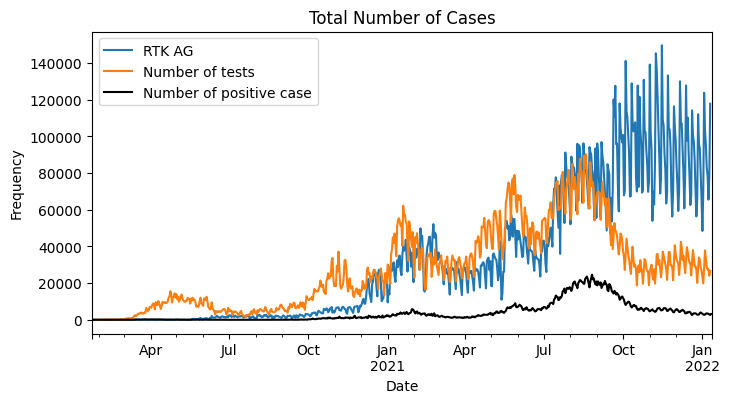

In [32]:
#TOTAL NUMBER OF CASES VS TESTS DONE (PCR and RTK)
import pandas as pd
import matplotlib.pyplot as plt

totaltests = pd.read_csv(folder + '/epidemic/tests_malaysia.csv', index_col=0, parse_dates=True, squeeze=True)

plt.figure(figsize=(8, 4), dpi=100)               
totaltests['rtk-ag'].plot (label='RTK AG')     
totaltests['pcr'].plot (label='Number of tests')
totalcase['cases_new'].plot (label='Number of positive case', color = 'black')

plt.title('Total Number of Cases')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()

  

In [9]:
totalpopulation = pd.read_csv(folder + 'static/population.csv', index_col=0, parse_dates=True, squeeze=True)
totalpopulation

,idxs,pop,pop_18,pop_60,pop_12
state,,,,,
Malaysia,0,32657400,23409600,3502000,3147500
Johor,1,3781000,2711900,428700,359900
Kedah,2,2185100,1540600,272500,211400
Kelantan,3,1906700,1236200,194100,210600
Melaka,4,932700,677400,118500,86500
Negeri Sembilan,5,1128800,814400,145000,109400
Pahang,6,1678700,1175800,190200,173000
Pulau Pinang,7,1773600,1367200,239200,141500
Perak,8,2510300,1862700,397300,237200


In [10]:
my_totalpop = pd.read_csv(folder + 'static/population.csv')
my_totalpop

,state,idxs,pop,pop_18,pop_60,pop_12
0,Malaysia,0,32657400,23409600,3502000,3147500
1,Johor,1,3781000,2711900,428700,359900
2,Kedah,2,2185100,1540600,272500,211400
3,Kelantan,3,1906700,1236200,194100,210600
4,Melaka,4,932700,677400,118500,86500
5,Negeri Sembilan,5,1128800,814400,145000,109400
6,Pahang,6,1678700,1175800,190200,173000
7,Pulau Pinang,7,1773600,1367200,239200,141500
8,Perak,8,2510300,1862700,397300,237200
9,Perlis,9,254900,181200,35100,23100


In [11]:
my_pop = my_totalpop['pop'].iloc[0]
my_pop

32657400

In [12]:
print(my_pop)

32657400


In [64]:
#positivity rate

import pandas as pd

newcases1= pd.read_csv(folder + '/epidemic/cases_malaysia.csv', usecols = ['cases_new'],)
newcases1
totaltests1 = pd.read_csv(folder + '/epidemic/tests_malaysia.csv', usecols = ['pcr'],)
totaltests1

positivity=newcases1/totaltests1
print(positivity)



plt.figure(figsize=(8, 4), dpi=100)               
totalrtk['rtk'].plot (label='RTK AG')     
totalpcr['pcr'].plot (label='Number of tests')
#positivity.plot (label='Positivity rate')

plt.title('Total Number of Cases')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()

     cases_new  pcr
0          NaN  NaN
1          NaN  NaN
2          NaN  NaN
3          NaN  NaN
4          NaN  NaN
..         ...  ...
714        NaN  NaN
715        NaN  NaN
716        NaN  NaN
717        NaN  NaN
718        NaN  NaN

[719 rows x 2 columns]


KeyError: ignored

<Figure size 800x400 with 0 Axes>

In [73]:
tests_malaysia = pd.read_csv(folder + 'epidemic/tests_malaysia.csv',index_col=0, parse_dates=True, squeeze=True)
tests_malaysia

df=tests_malaysia['rtk-ag']
df.head()


date
2020-01-24    0
2020-01-25    0
2020-01-26    0
2020-01-27    0
2020-01-28    0
Name: rtk-ag, dtype: int64

In [81]:
#Mysejahtera utilization

mysejahtera = pd.read_csv(folder + 'mysejahtera/checkin_malaysia.csv',index_col=0, parse_dates=True, squeeze=True)
mysejahtera
df=mysejahtera['checkins']
print(df)

date
2020-12-01    17492265
2020-12-02    17695726
2020-12-03    17063123
2020-12-04    18350879
2020-12-05    19711082
                ...   
2022-01-07    31115766
2022-01-08    33149075
2022-01-09    31837800
2022-01-10    28575189
2022-01-11    28215444
Name: checkins, Length: 407, dtype: int64


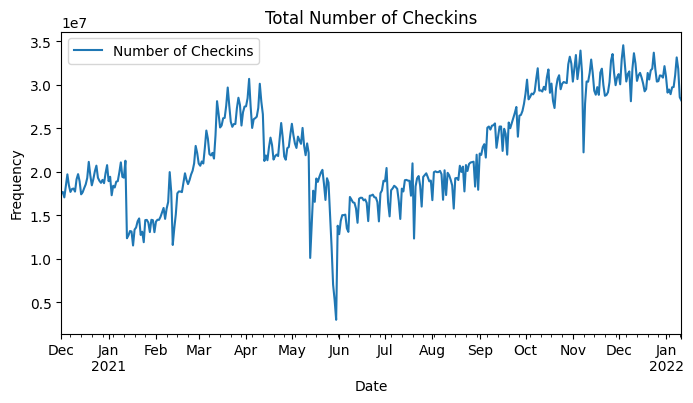

In [82]:
#plotting the graph of checkins
plt.figure(figsize=(8, 4), dpi=100)               
df.plot (label='Number of Checkins')     



plt.title('Total Number of Checkins')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()


In [89]:
#contact tracing


trace_mysjh = pd.read_csv(folder + 'mysejahtera/trace_malaysia.csv',index_col=0, parse_dates=True, squeeze=True)
trace_mysjh
df2=trace_mysjh['casual_contacts']
print(df)

date
2020-12-01    17492265
2020-12-02    17695726
2020-12-03    17063123
2020-12-04    18350879
2020-12-05    19711082
                ...   
2022-01-07    31115766
2022-01-08    33149075
2022-01-09    31837800
2022-01-10    28575189
2022-01-11    28215444
Name: checkins, Length: 407, dtype: int64


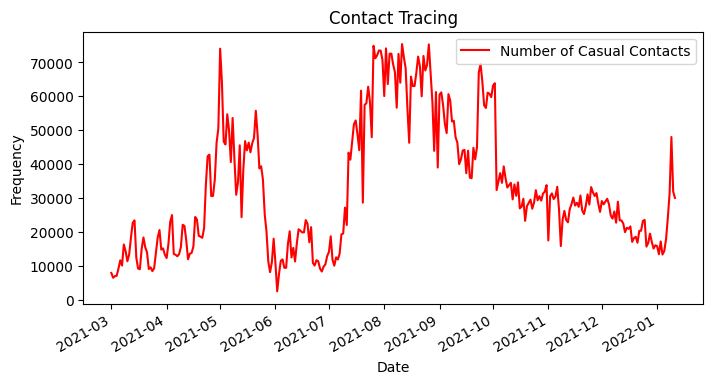

In [92]:
#plotting the graph  contact tracing 
plt.figure(figsize=(8, 4), dpi=100)                  
df2.plot (label='Number of Casual Contacts', color='red')     

plt.title('Contact Tracing')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()

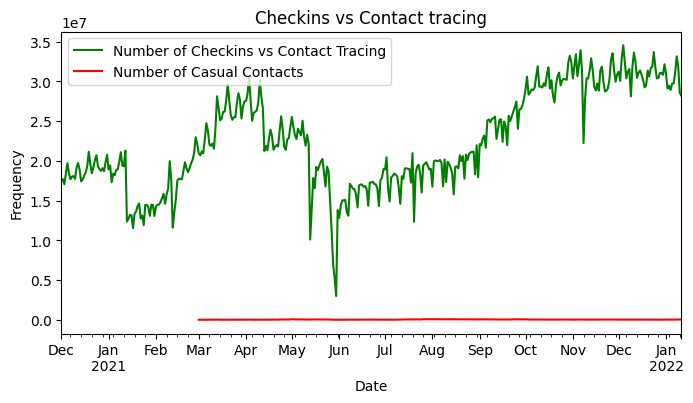

In [93]:
plt.figure(figsize=(8, 4), dpi=100)  
df.plot (label='Number of Checkins vs Contact Tracing', color='green')                  
df2.plot (label='Number of Casual Contacts', color='red')     

plt.title('Checkins vs Contact tracing')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.legend()

In [9]:
import pandas as pd 

daily_cases = pd.read_csv(folder + 'epidemic/cases_malaysia.csv',index_col=0, parse_dates=True, squeeze=True)

test = pd.read_csv(folder + 'epidemic/tests_malaysia.csv',index_col=0, parse_dates=True, squeeze=True)

In [11]:
# Standardized starting date and end date 
# Set starting date as 2020-01-25
new_test = test.drop(test.head(1).index)
print(new_test)

# Set end date as 2022-01-10
new_daily_cases = daily_cases.drop(daily_cases.tail(2).index)
print(new_daily_cases)

            rtk-ag    pcr
date                     
2020-01-25       0      5
2020-01-26       0     14
2020-01-27       0     24
2020-01-28       0     53
2020-01-29       0     71
...            ...    ...
2022-01-06   83025  28721
2022-01-07   78894  27388
2022-01-08   65561  27678
2022-01-09   77743  24072
2022-01-10  117851  26692

[717 rows x 2 columns]
            cases_new  cases_import  ...  cluster_detentionCentre  cluster_workplace
date                                 ...                                            
2020-01-25          4             4  ...                      NaN                NaN
2020-01-26          0             0  ...                      NaN                NaN
2020-01-27          0             0  ...                      NaN                NaN
2020-01-28          0             0  ...                      NaN                NaN
2020-01-29          3             3  ...                      NaN                NaN
...               ...           ...  ...   

In [12]:
# Calculate the daily total tests performed.
total = new_test['rtk-ag'] + new_test['pcr']
new_test["total"] = total

# Calculate positive rate.
# positve rate = daily cases / total test*100
rate = new_daily_cases['cases_new']/ new_test['total'] * 100
new_test["positive_rate"] = rate
new_test

,rtk-ag,pcr,total,positive_rate
date,,,,
2020-01-25,0,5,5,80.000000
2020-01-26,0,14,14,0.000000
2020-01-27,0,24,24,0.000000
2020-01-28,0,53,53,0.000000
2020-01-29,0,71,71,4.225352
...,...,...,...,...
2022-01-06,83025,28721,111746,3.170583
2022-01-07,78894,27388,106282,3.181160
2022-01-08,65561,27678,93239,3.486738


In [13]:
# Calculate percentage.
a = new_test['rtk-ag']/ new_test['total'] * 100
new_test["perc_rtk"] = a
b = new_test['pcr']/ new_test['total'] * 100
new_test["perc_pcr"] = b
new_test

,rtk-ag,pcr,total,positive_rate,perc_rtk,perc_pcr
date,,,,,,
2020-01-25,0,5,5,80.000000,0.000000,100.000000
2020-01-26,0,14,14,0.000000,0.000000,100.000000
2020-01-27,0,24,24,0.000000,0.000000,100.000000
2020-01-28,0,53,53,0.000000,0.000000,100.000000
2020-01-29,0,71,71,4.225352,0.000000,100.000000
...,...,...,...,...,...,...
2022-01-06,83025,28721,111746,3.170583,74.297961,25.702039
2022-01-07,78894,27388,106282,3.181160,74.230820,25.769180
2022-01-08,65561,27678,93239,3.486738,70.314997,29.685003


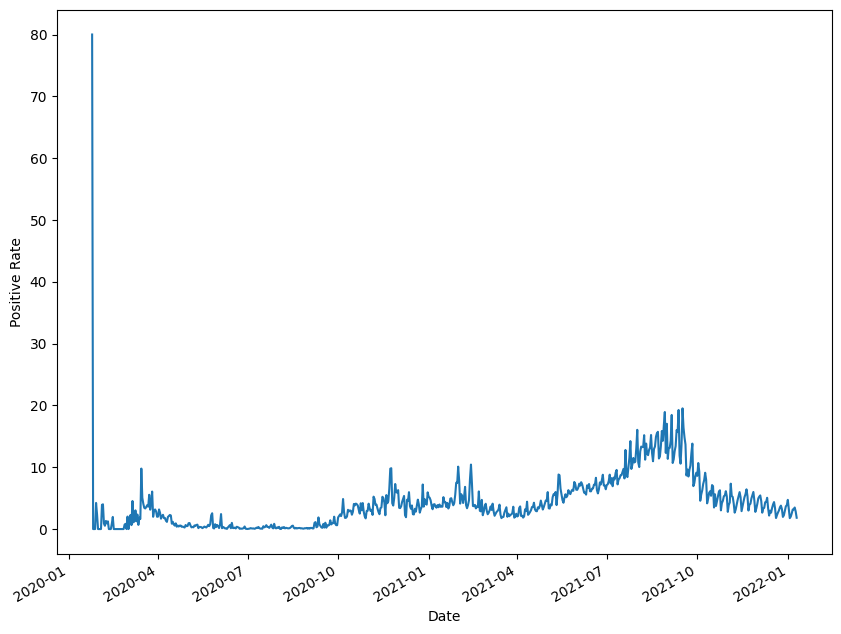

In [14]:
# Import library 
import matplotlib.pyplot as plt

# Plot graph
plt.figure(figsize=(10, 8), dpi = 100)
plt.plot(new_test['positive_rate'])
# plt.title('')
plt.xlabel('Date')
plt.ylabel('Positive Rate')

# Making x-axis values (date) clearer
plt.gcf().autofmt_xdate()

plt.show()

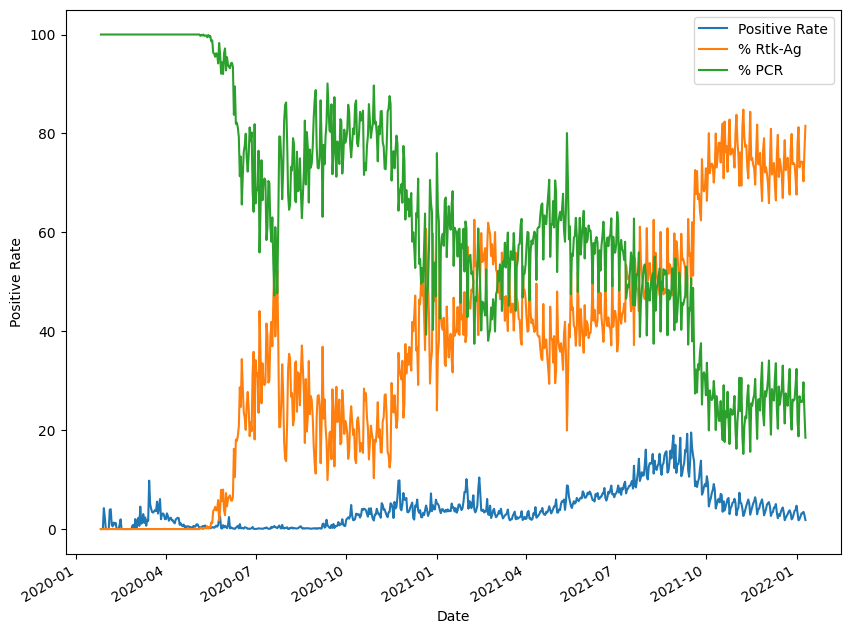

In [15]:
# Removing data on 2020-01-25.
new_test1 = new_test.drop(new_test.head(1).index)

# Re-plot graph.
plt.figure(figsize=(10, 8), dpi = 100)
plt.plot(new_test1['positive_rate'])
plt.plot(new_test1['perc_rtk'])
plt.plot(new_test1['perc_pcr'])
# plt.title('')
plt.xlabel('Date')
plt.ylabel('Positive Rate')
plt.legend(['Positive Rate','% Rtk-Ag','% PCR'])

# Making x-axis values (date) clearer
plt.gcf().autofmt_xdate()

plt.show()